### Packages and Imports

In [1]:
import torch
import pandas as pd
import numpy as np

from datetime import datetime
from matplotlib import pyplot as plt

from utils.instruments import Stock, RiskFactor
from utils.data_handler import YahooDataHandler
from models.ar import AR
from models.garch import GARCH

%config InlineBackend.figure_format = 'retina'
plt.style.use(['science', 'notebook', 'grid'])

### Financial Data

In [2]:
ydh = YahooDataHandler()

ticker = "GS"

# Start and end dates.
start = datetime.strptime("2010-05-01", r"%Y-%m-%d")
end = datetime.strptime("2023-06-01", r"%Y-%m-%d")

price_history = ydh.get_price_history(ticker, start, end)
identifier = f"{ticker}_RF"
risk_factor = RiskFactor(identifier, price_history)
stock = Stock(identifier=ticker, risk_factors=[risk_factor])

data = risk_factor.price_history.log_returns

[*********************100%***********************]  1 of 1 completed


In [3]:
ar_model = AR(data)
ar_model.calibrate()
ar_model.parameters

[tensor([-0.0643,  0.0694, -0.0192]), tensor(0.0003), tensor(0.0181)]

(array([5.000e+00, 5.000e+00, 2.600e+01, 3.750e+02, 2.252e+03, 5.900e+02,
        3.200e+01, 5.000e+00, 1.000e+00, 1.000e+00]),
 array([-0.13588045, -0.10609728, -0.07631411, -0.04653094, -0.01674776,
         0.01303541,  0.04281858,  0.07260175,  0.10238492,  0.1321681 ,
         0.16195127]),
 <BarContainer object of 10 artists>)

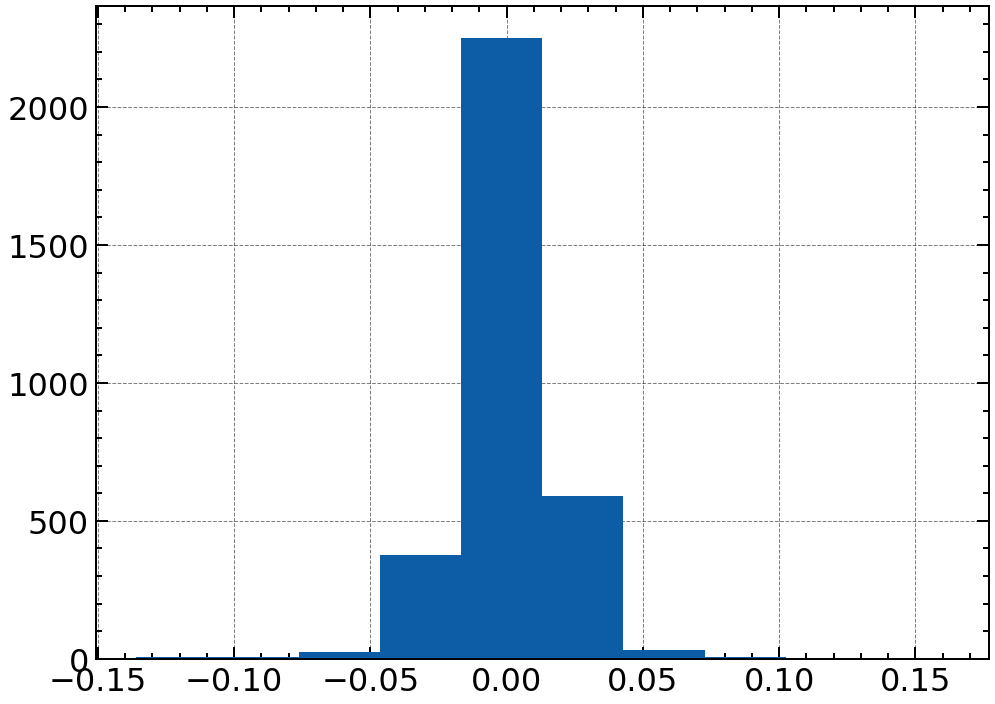

In [4]:
plt.hist(data)

inital vol 0.024101151153445244
long vol: 0.018115589395165443


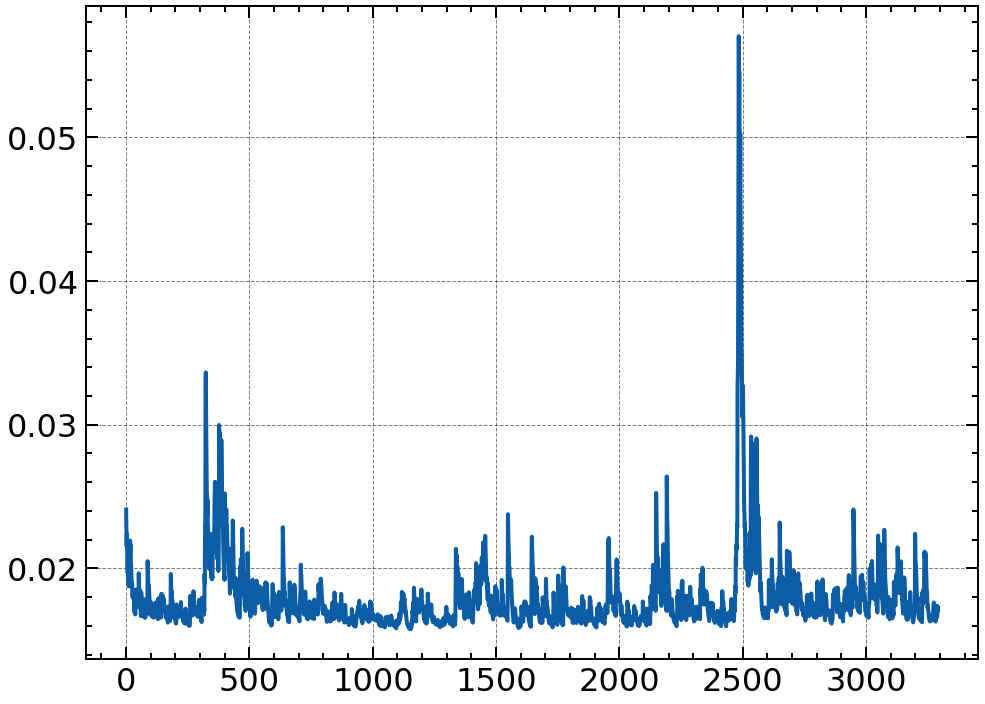

-23674.223776958206


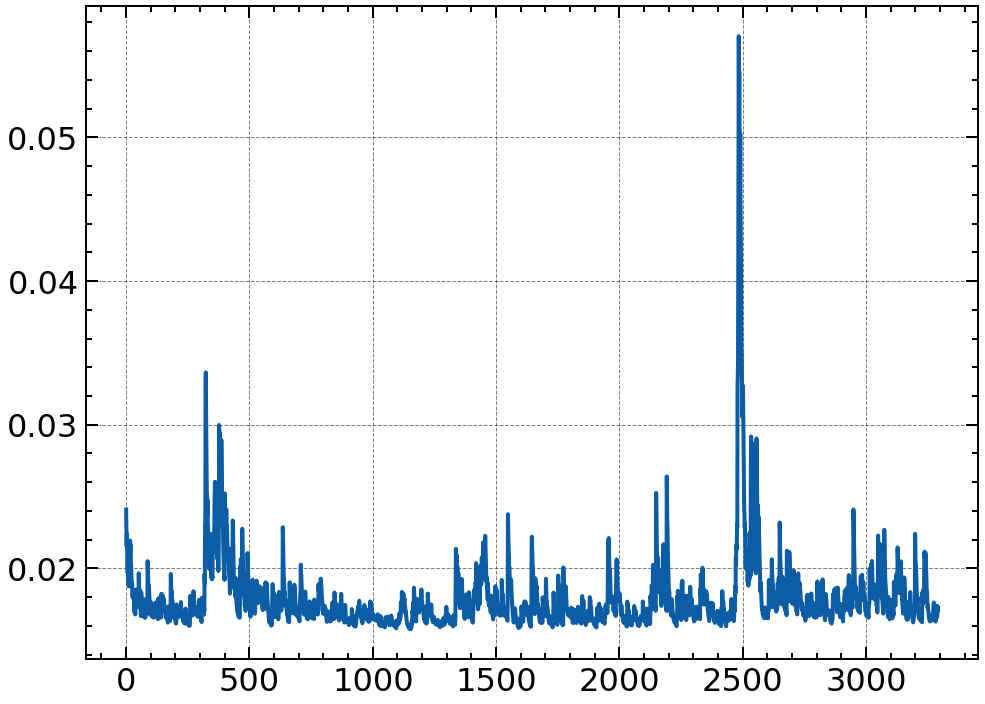

-23674.22377861384


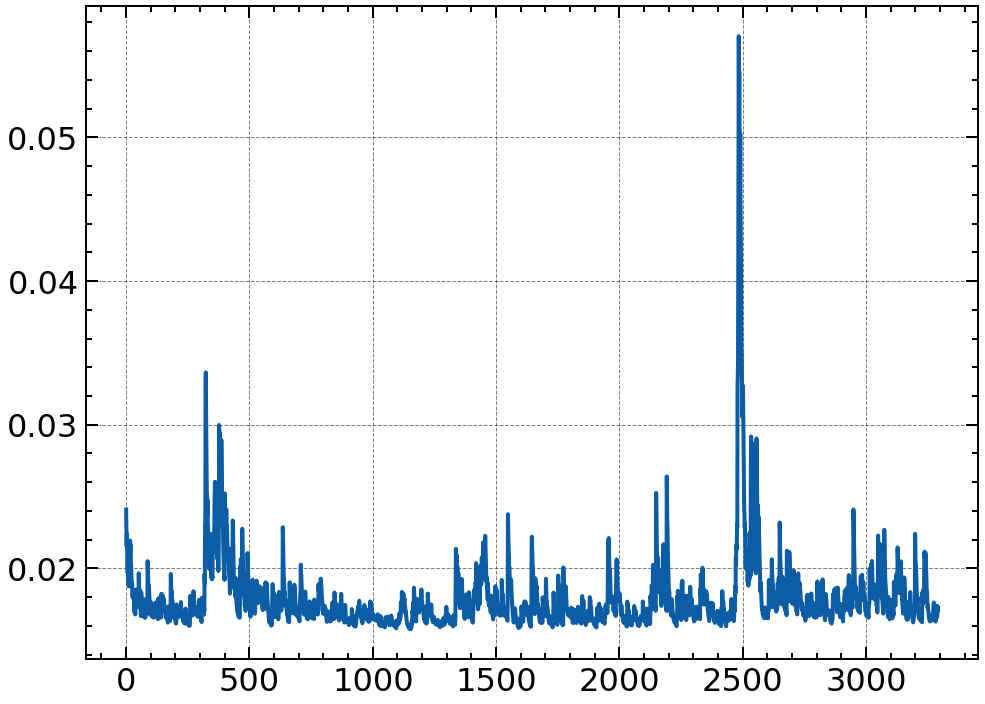

-23674.223775326056


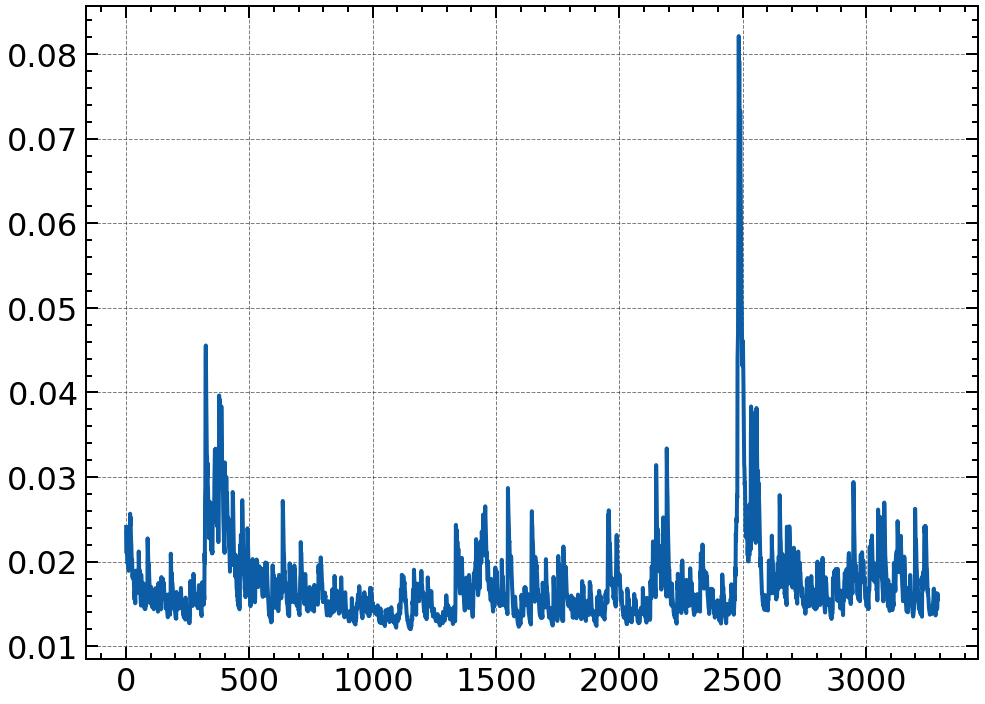

-23858.462519706532


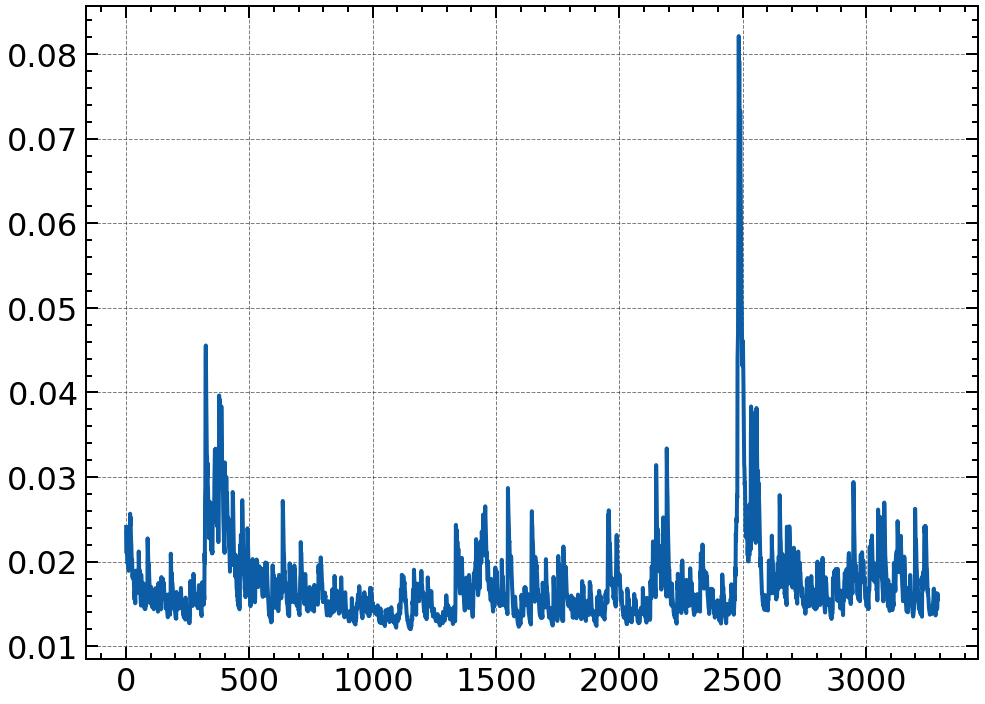

-23858.462520496832


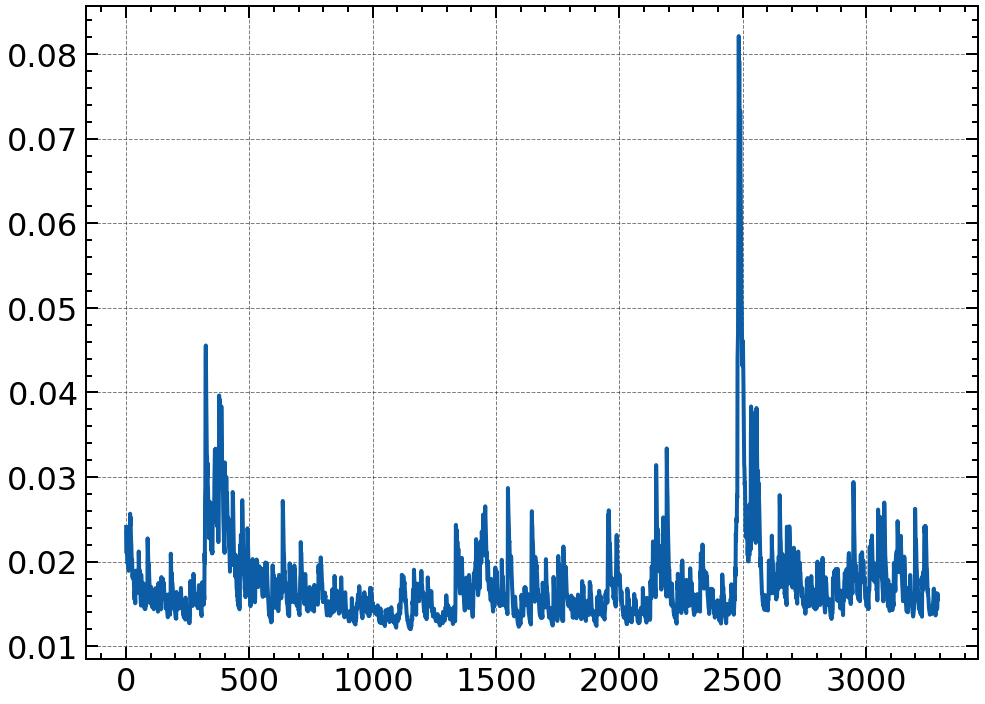

-23858.46251913985


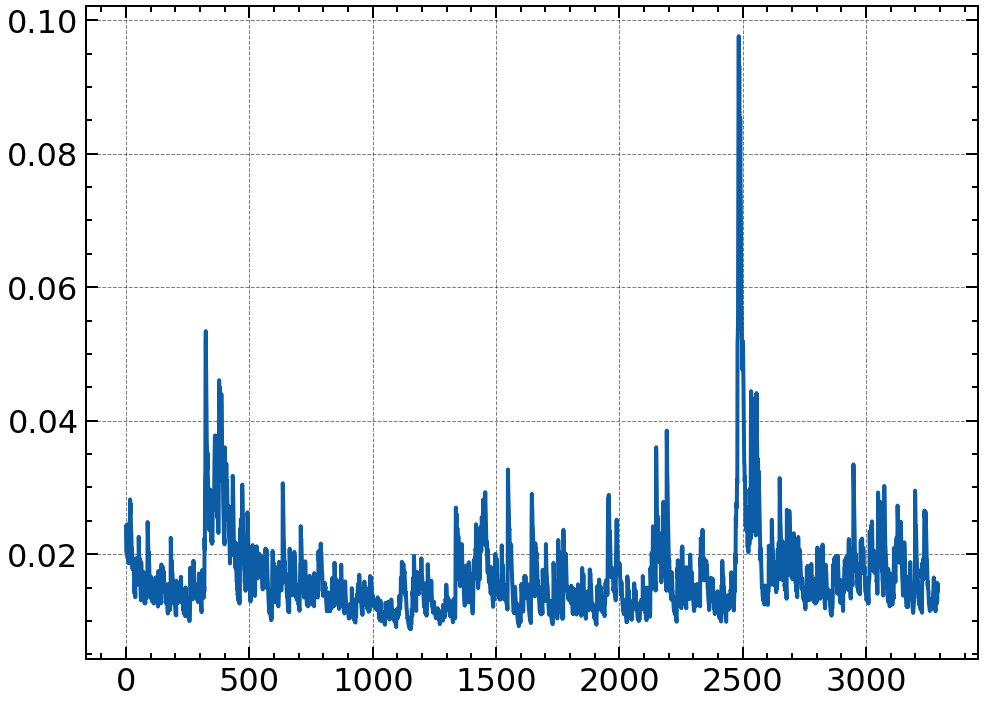

-23854.025110119175


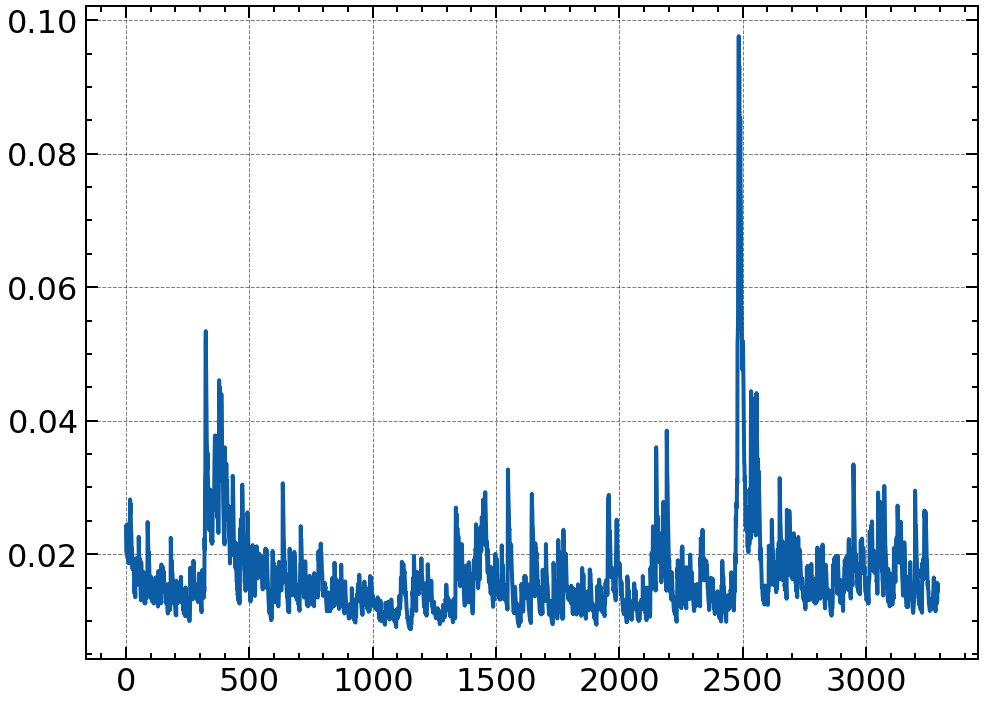

-23854.025109612754


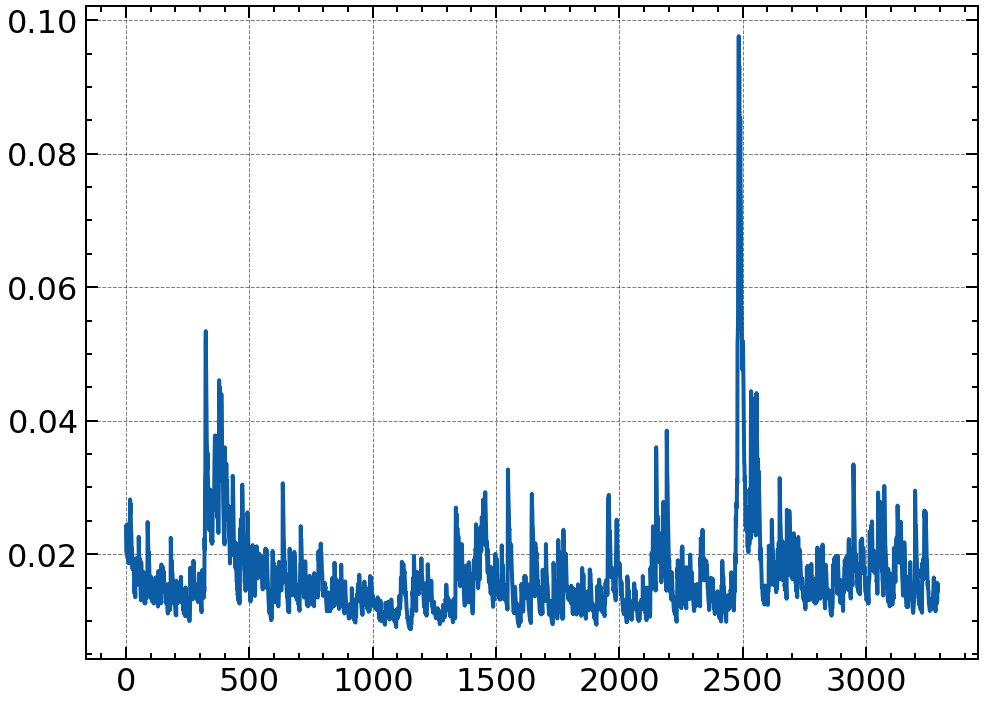

-23854.02511163798


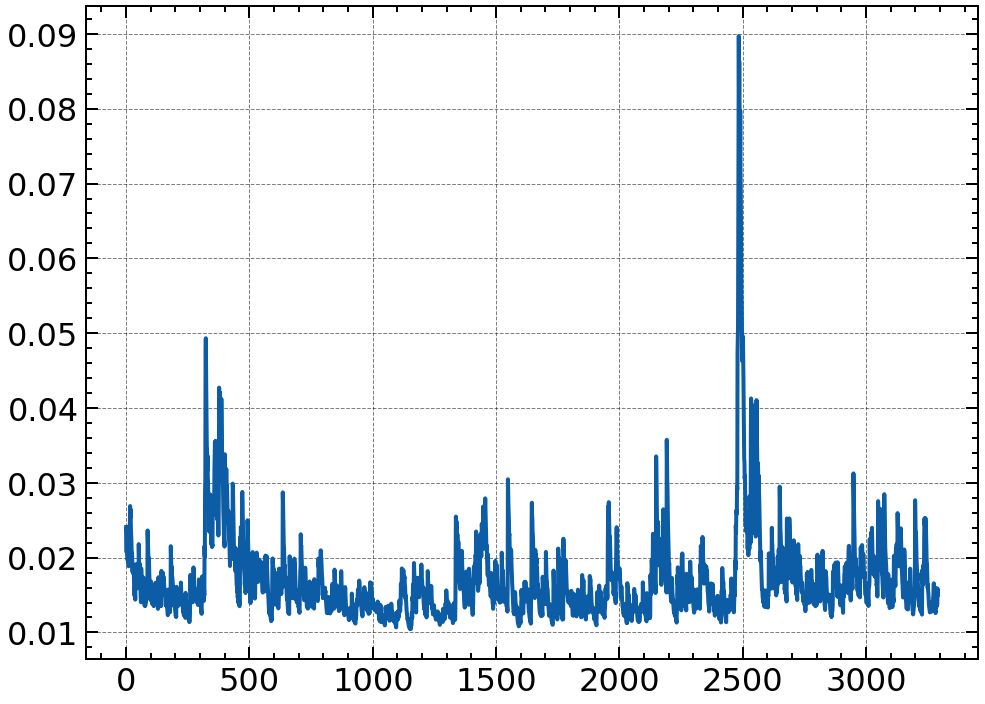

-23876.74115379144


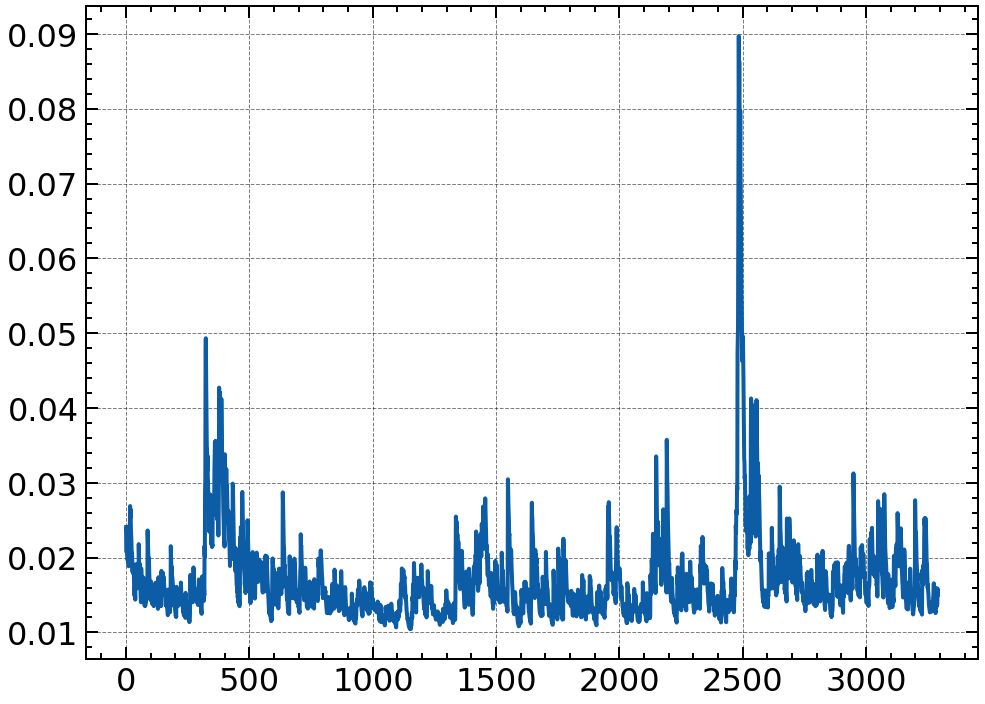

-23876.74115397575


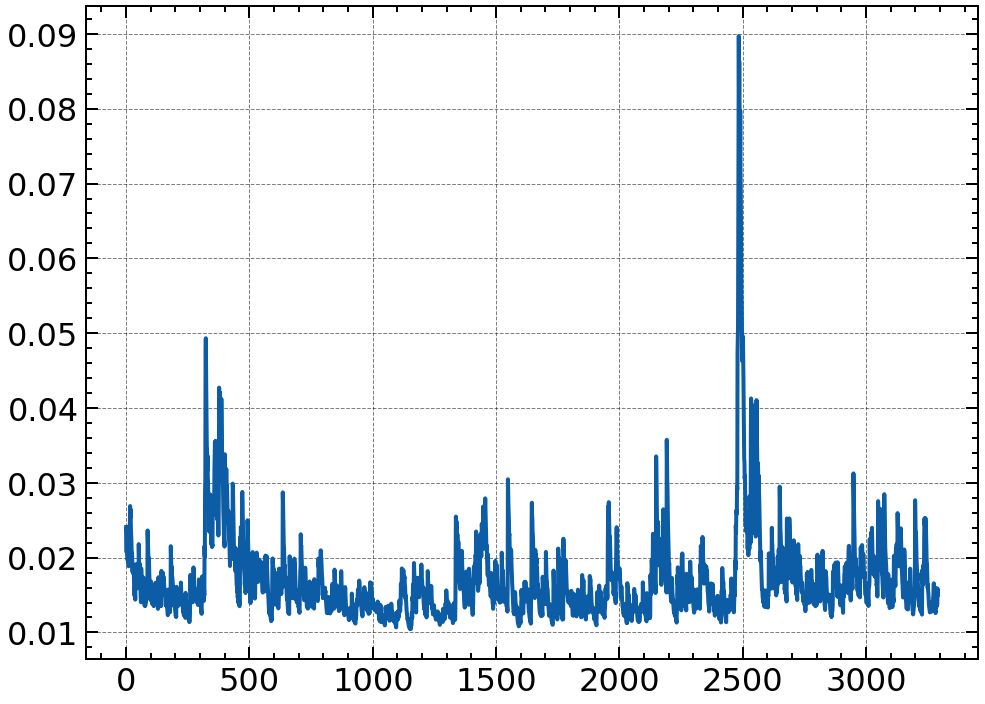

-23876.741154075447


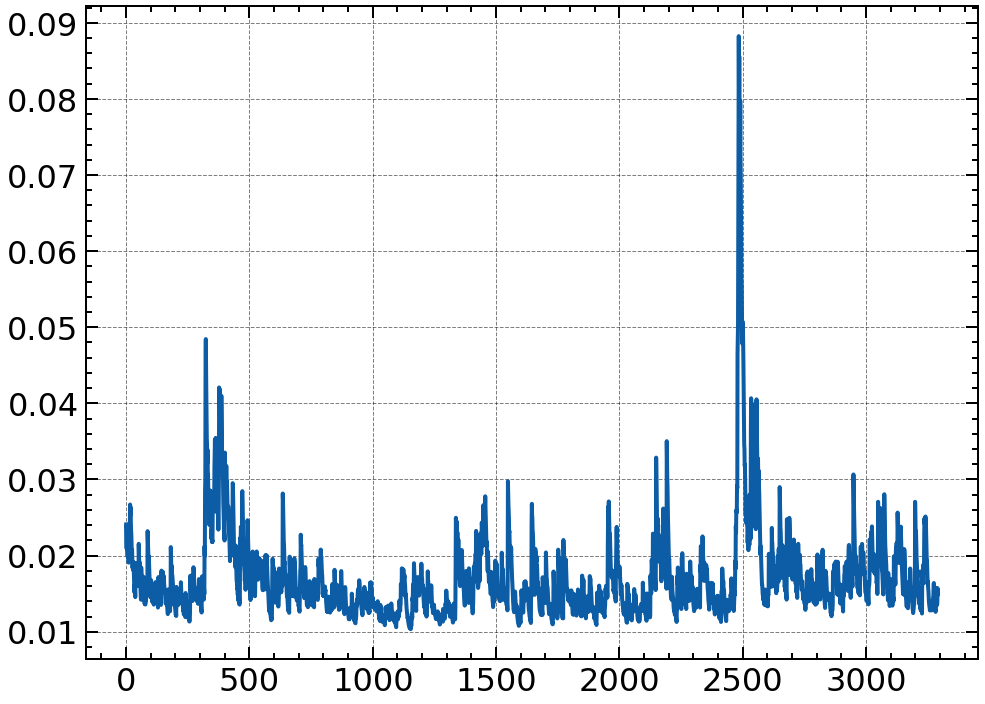

-23880.32254753416


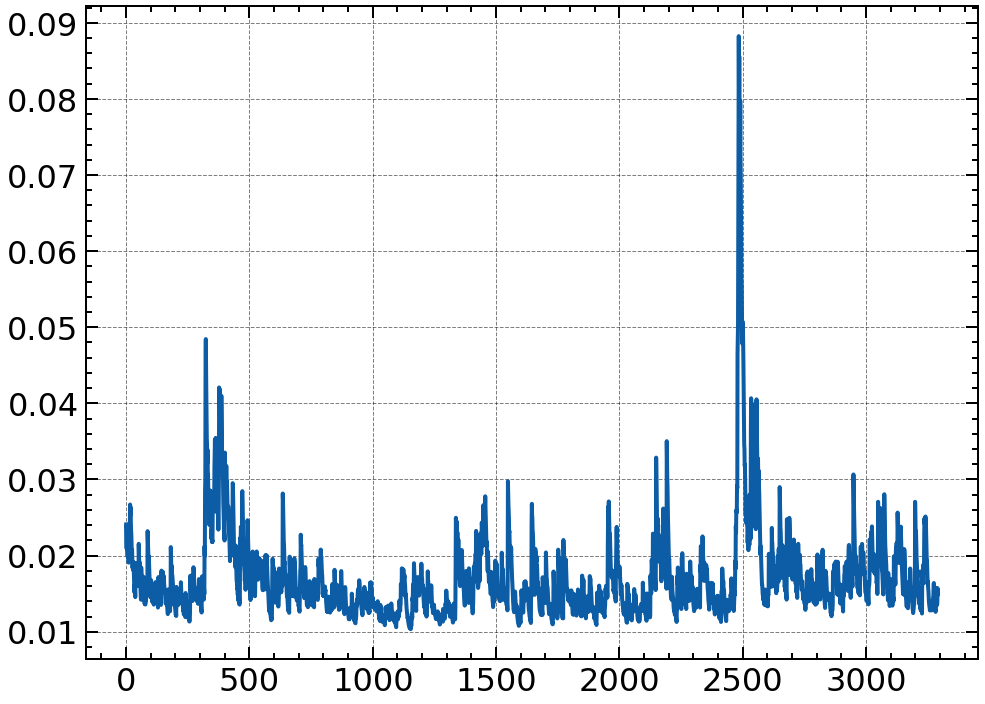

-23880.322547693897


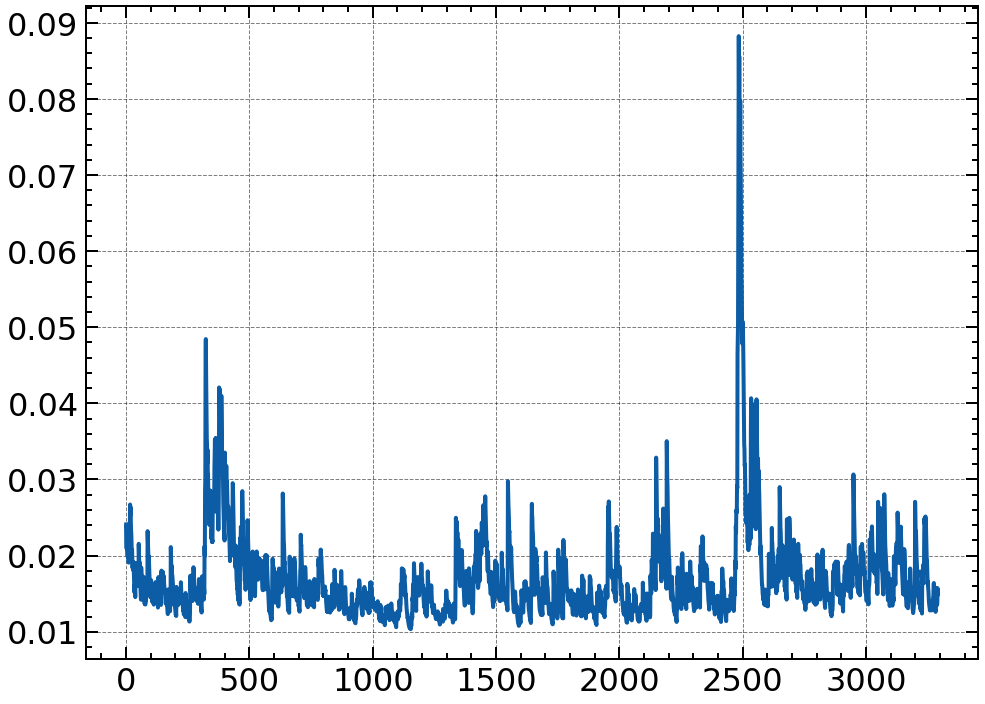

-23880.32254777458


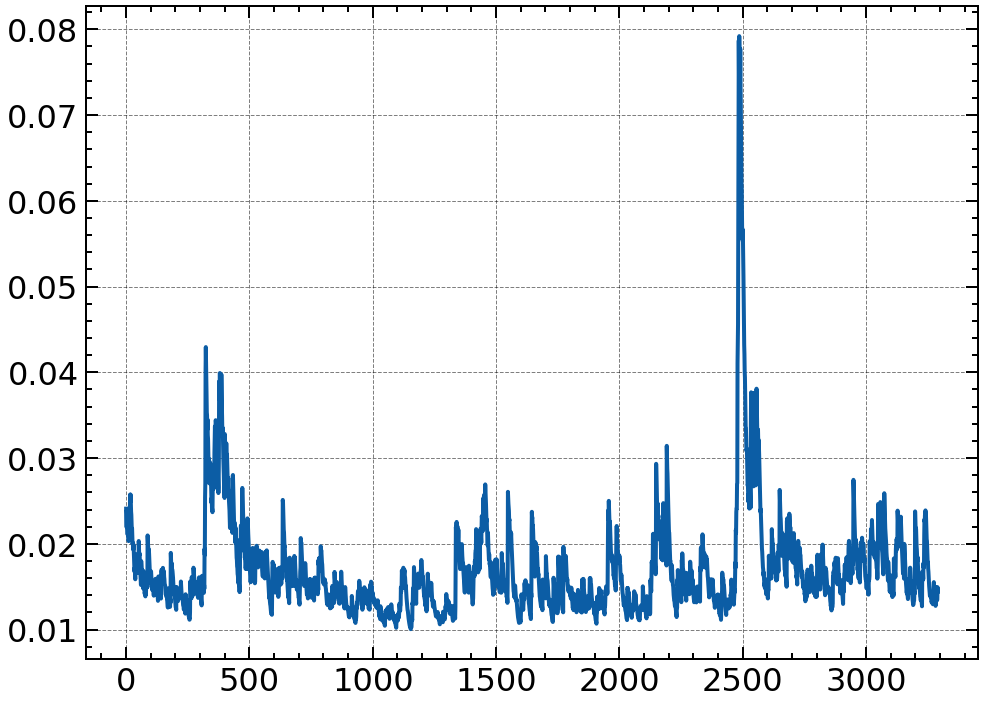

-23891.199746067658


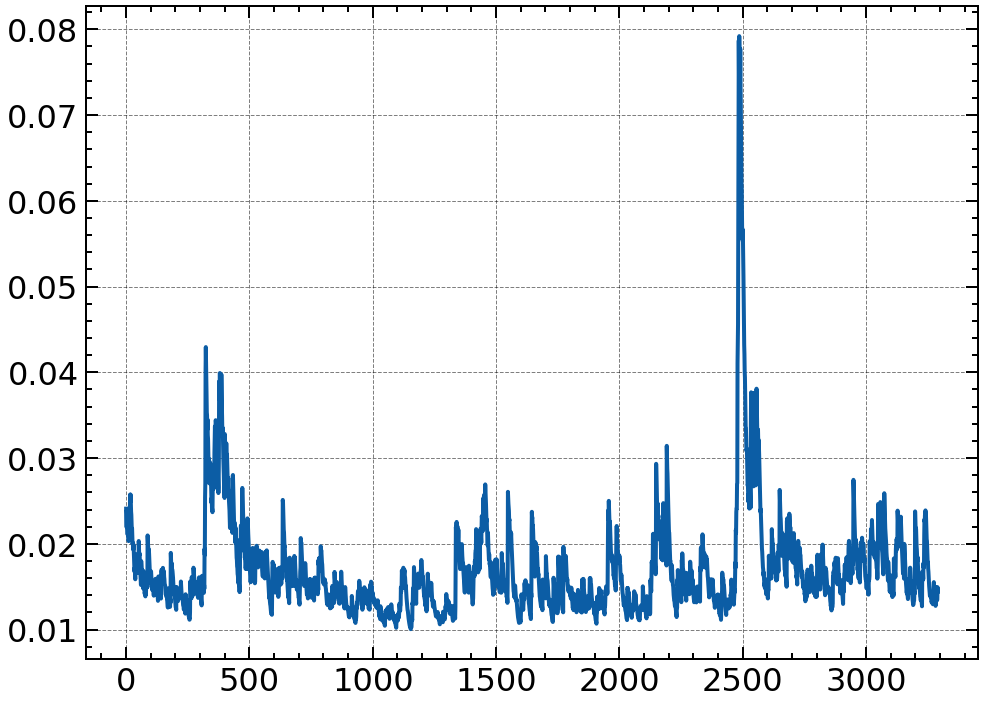

-23891.19974611605


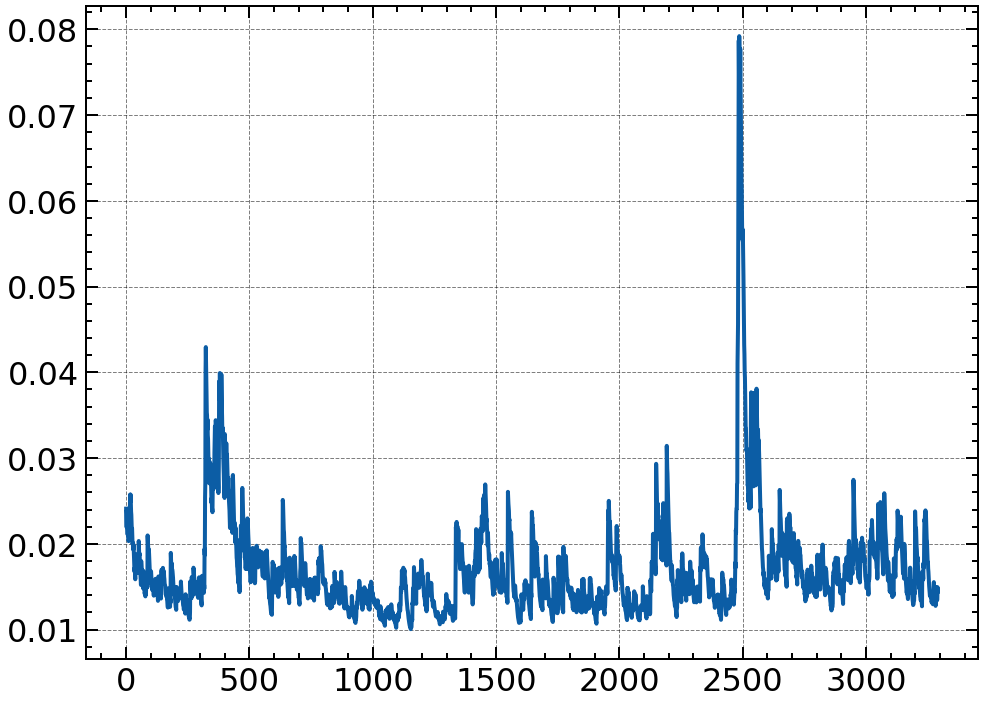

-23891.199746060454


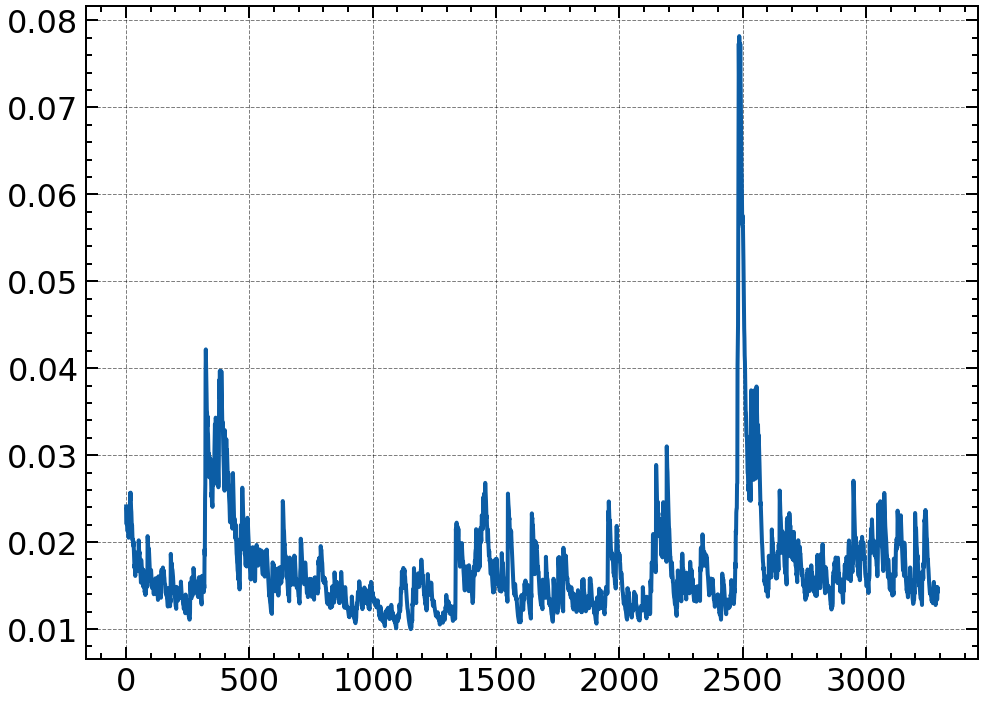

-23891.528877044624


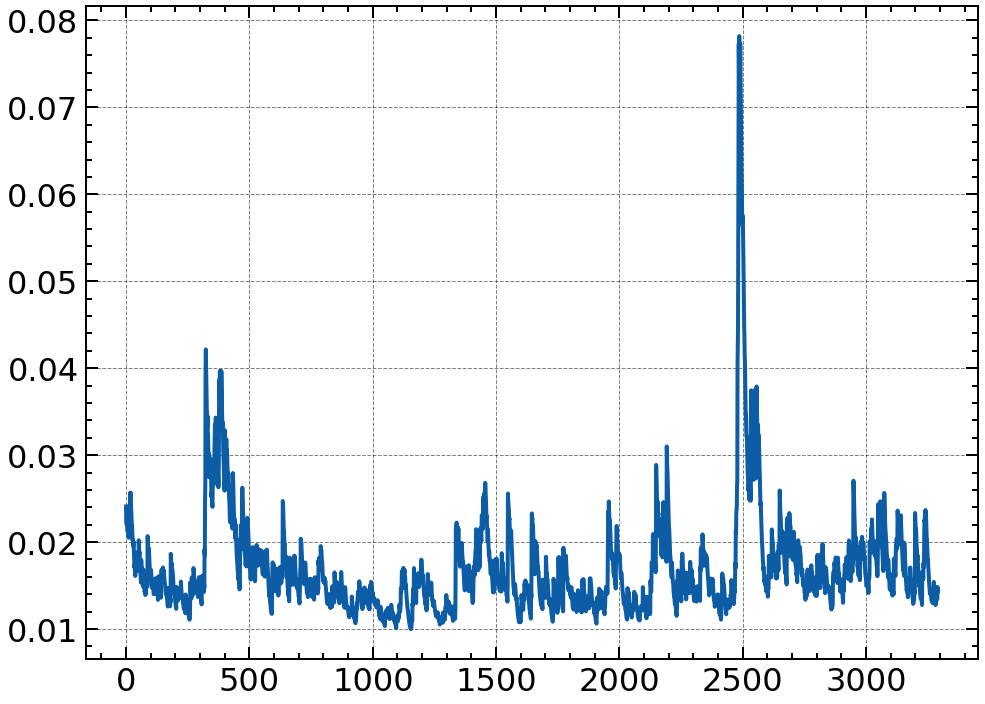

-23891.52887705953


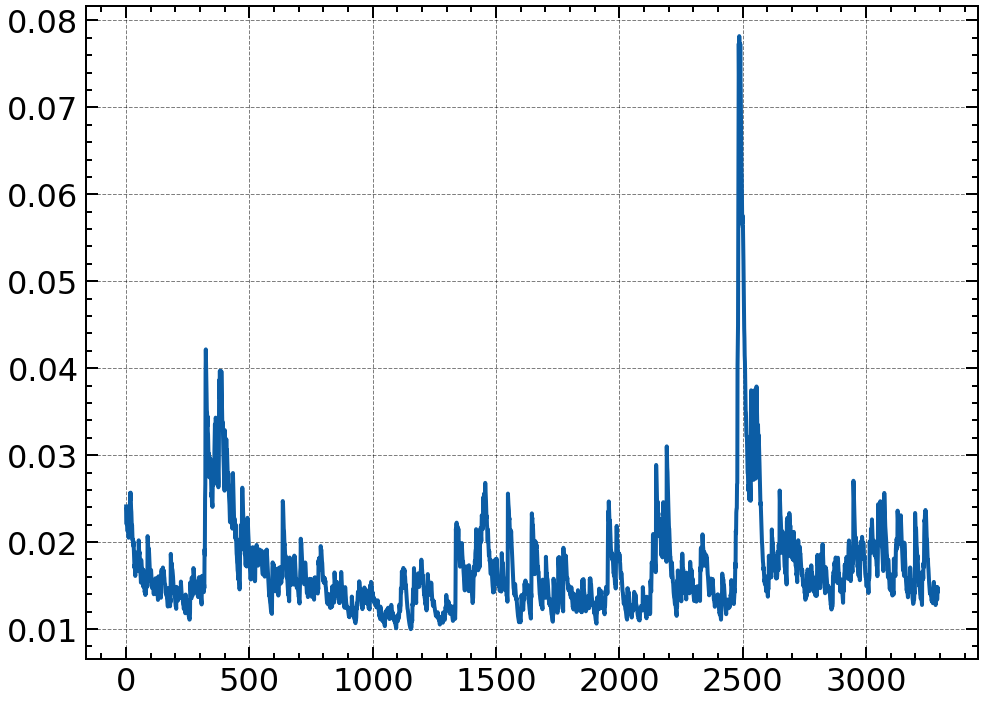

-23891.52887703213


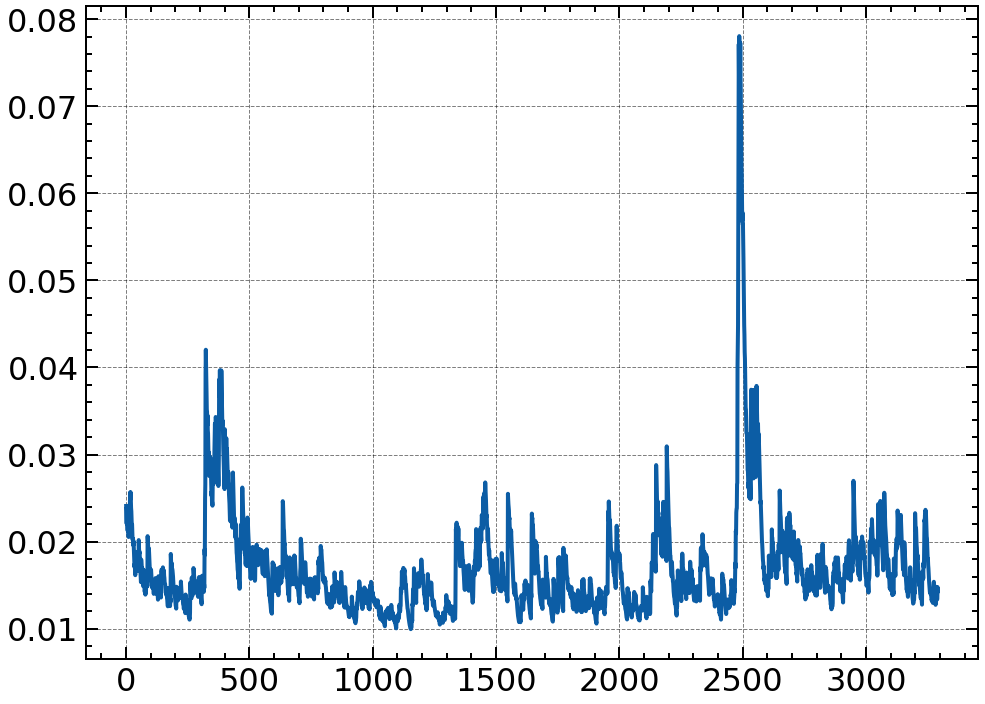

-23891.54785285776


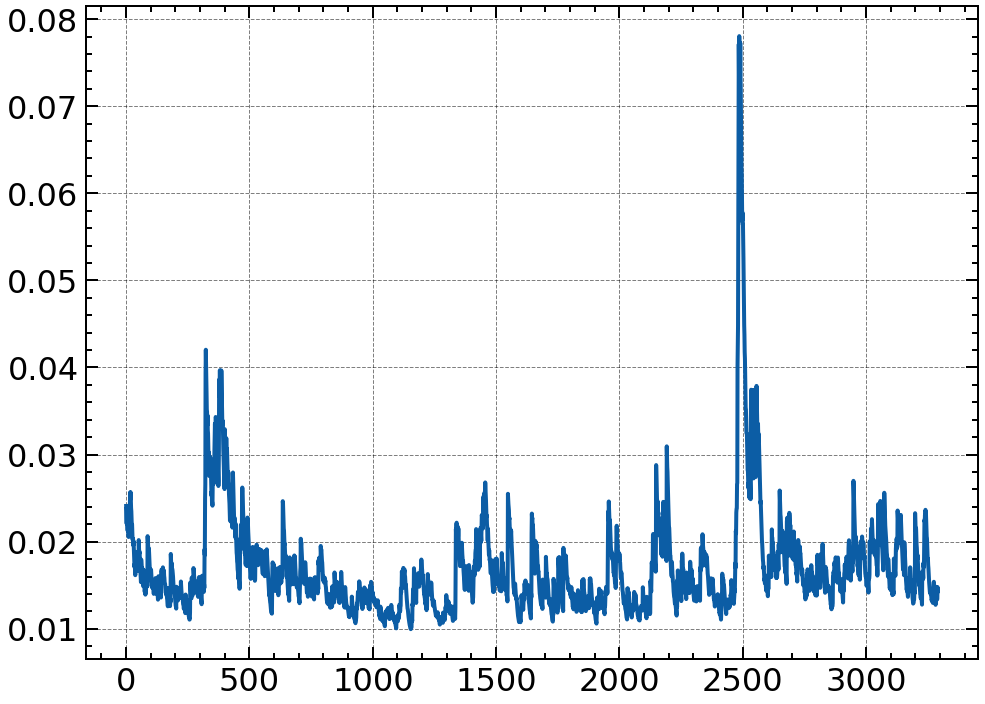

-23891.547852859632


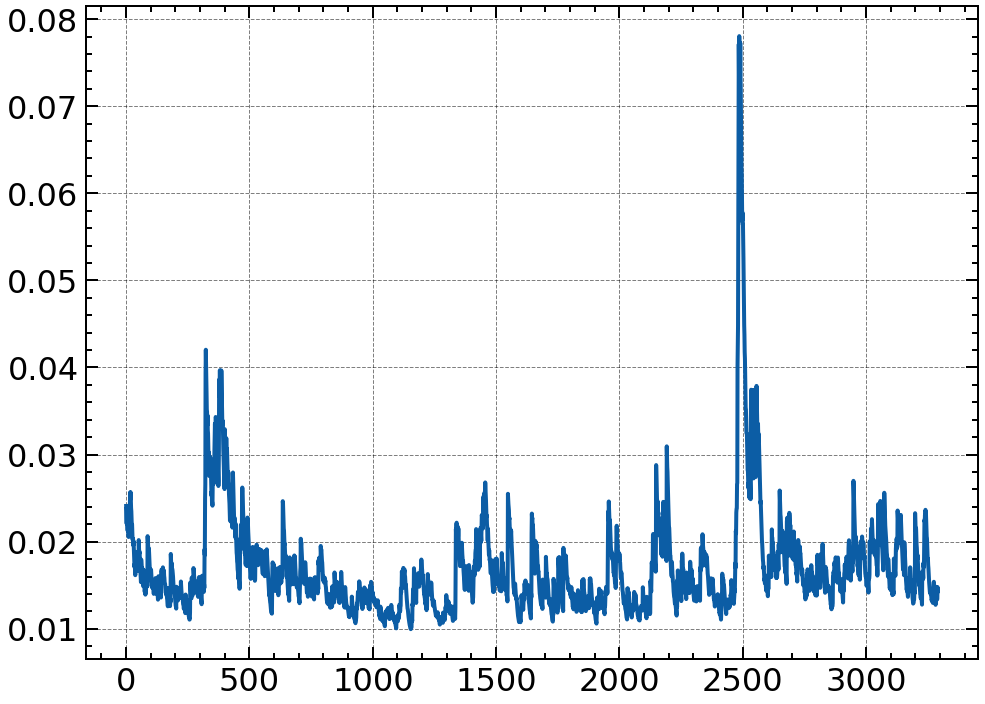

-23891.54785285479


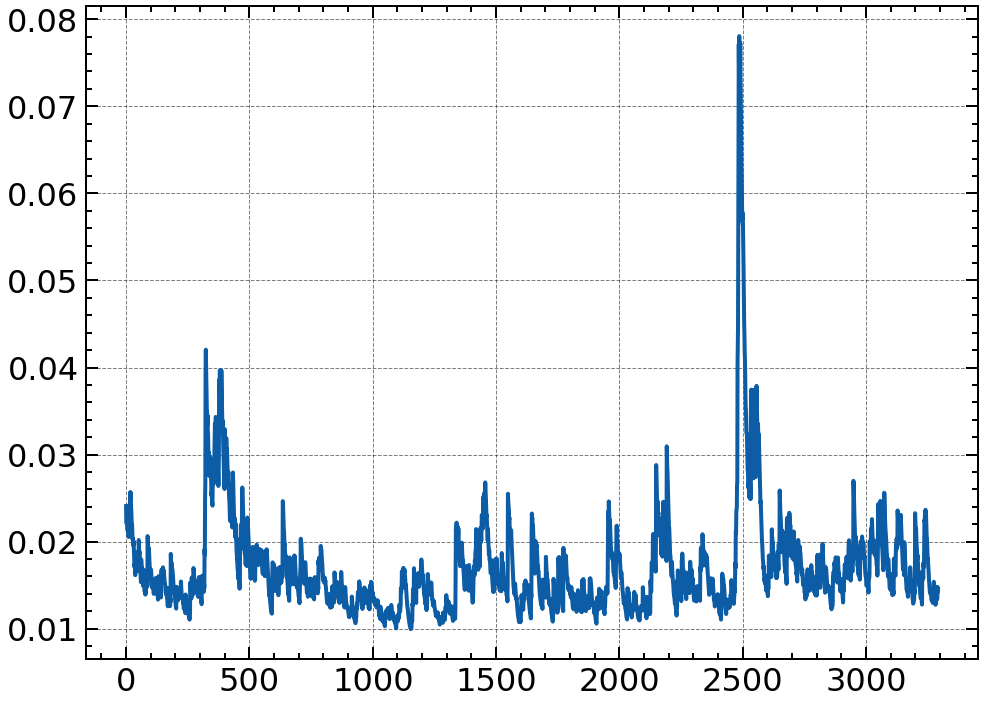

-23891.548104695852


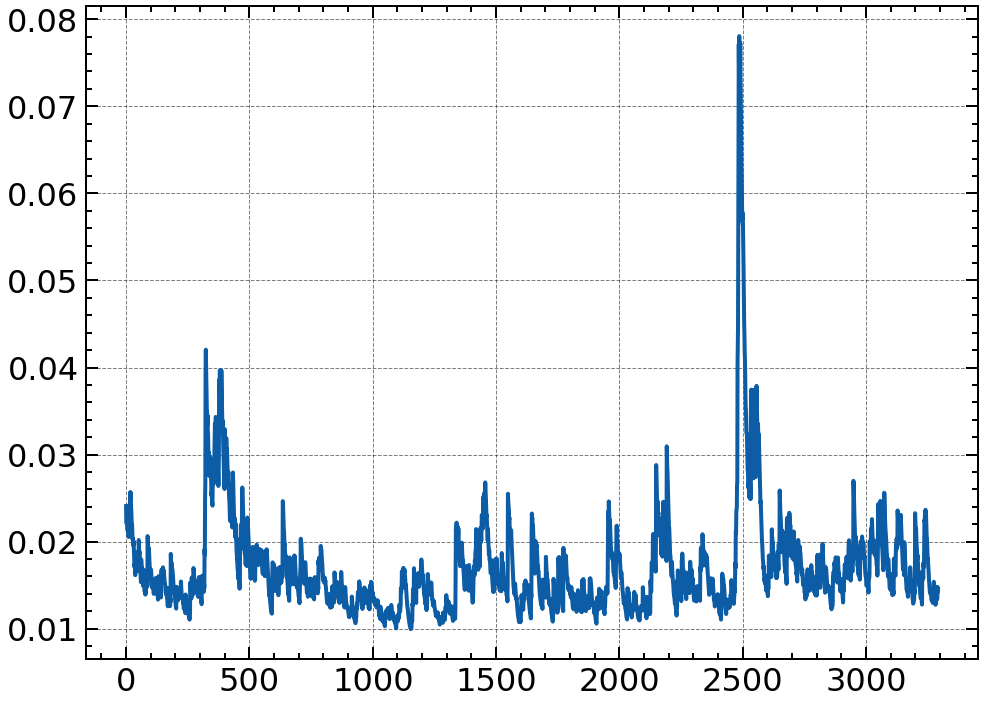

-23891.548104695947


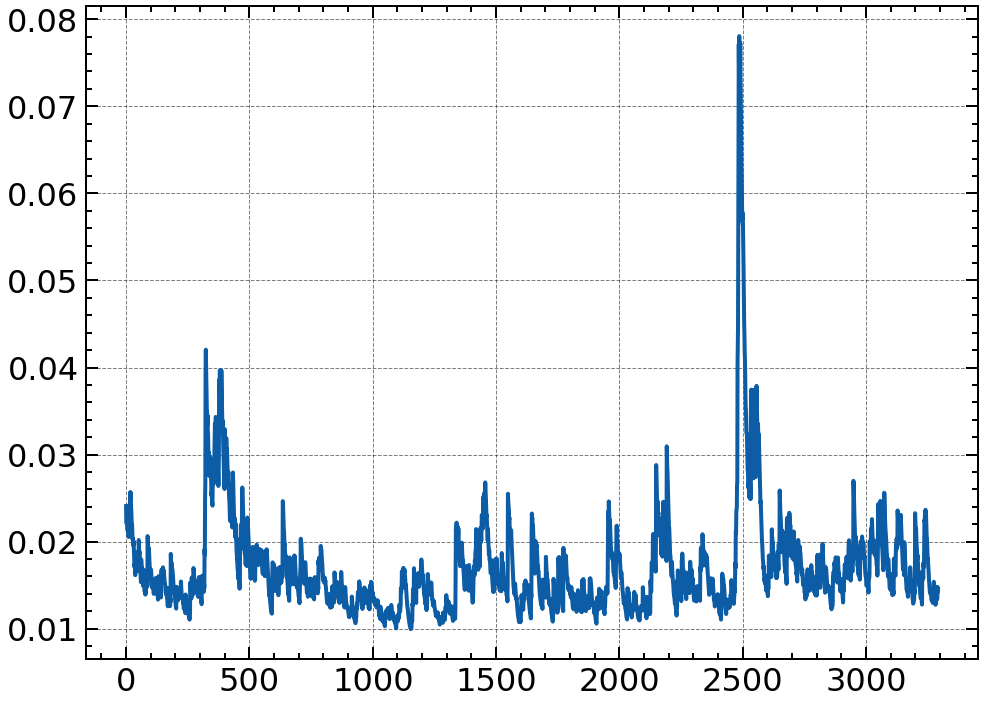

-23891.54810469558


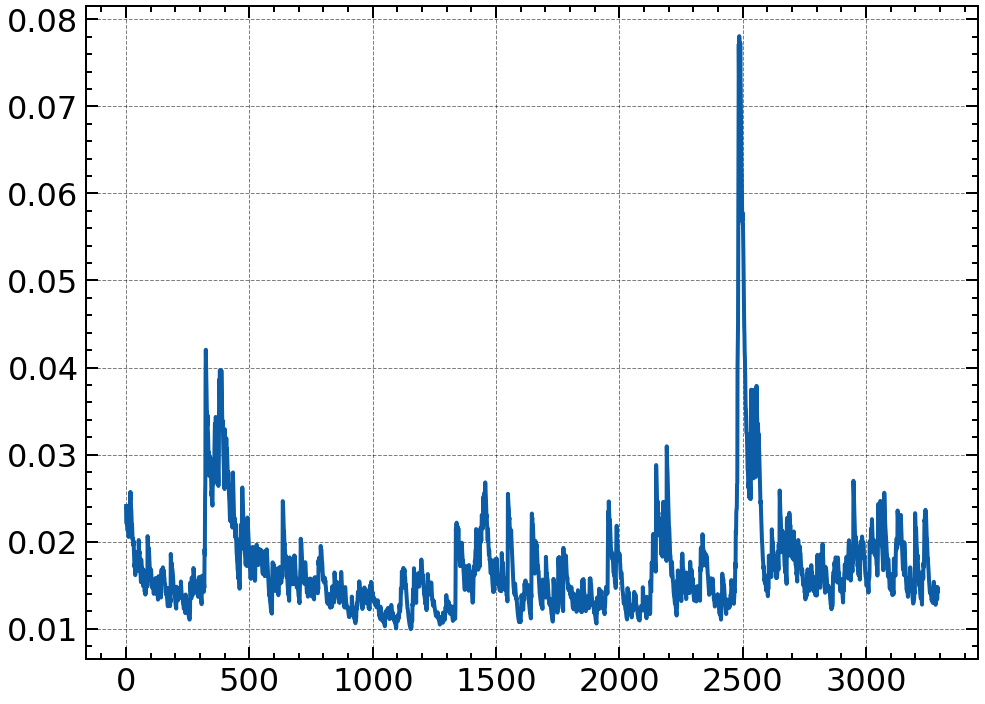

-23891.548106377002


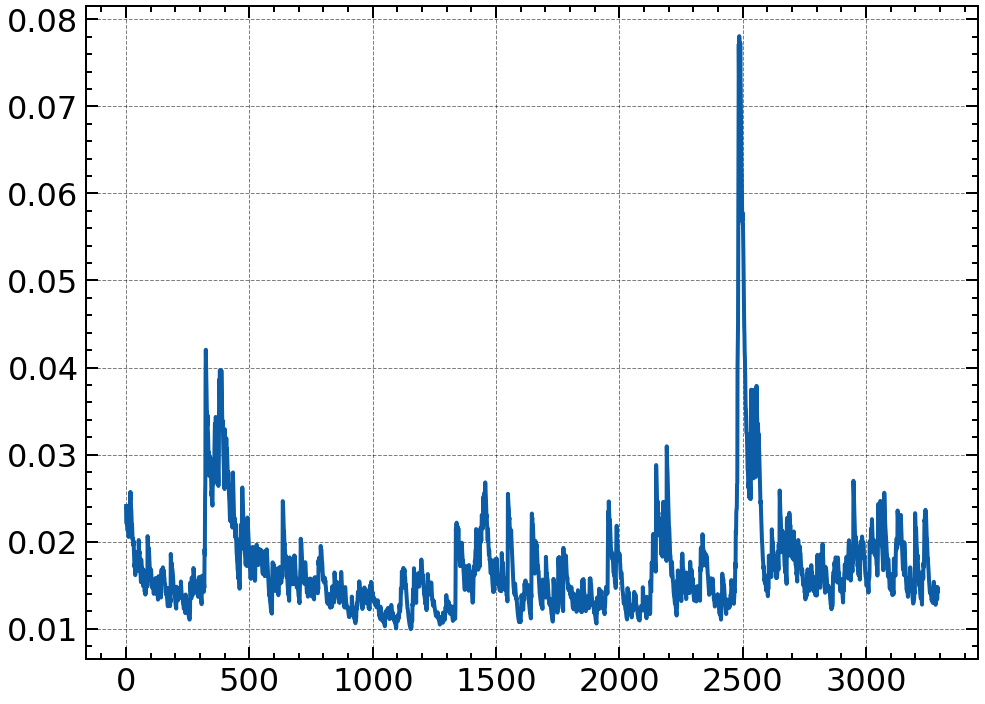

-23891.548106377002


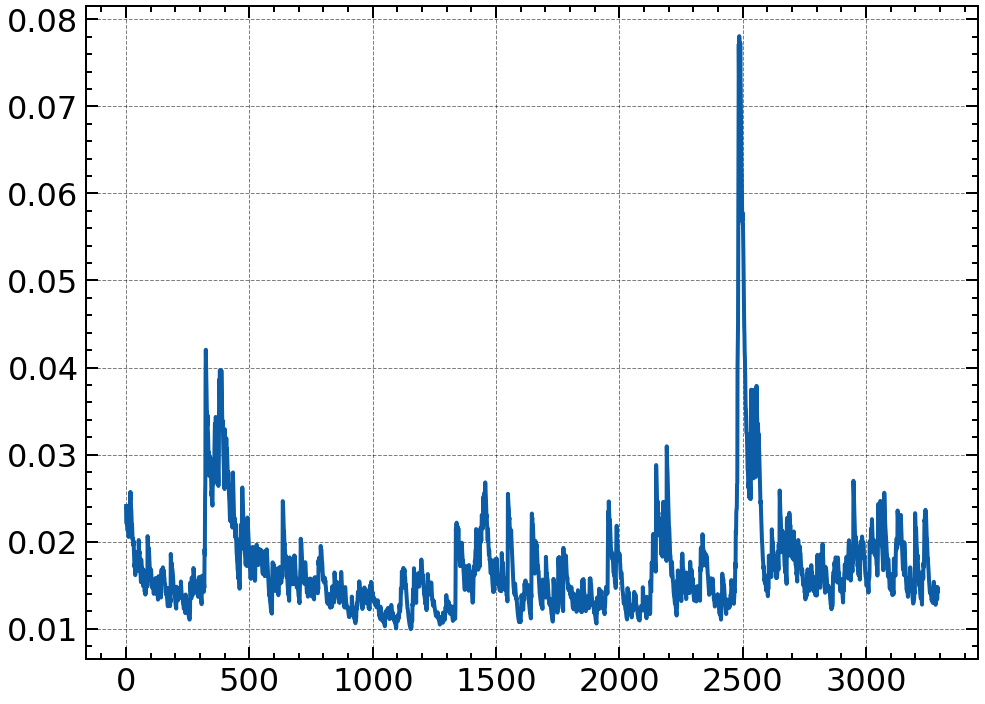

-23891.548106376995


In [5]:
garch_model = GARCH(data)
garch_model.calibrate()


In [6]:
parameters = garch_model._solution.x
parameters = garch_model._uncondition_parameters(parameters)
parameters

array([0.08024296, 0.89615491])

In [7]:
garch_model._solution

      fun: -23891.548106377002
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.       , 0.0007276])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 30
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([3.73449936, 2.45623912])